# UNDERSTAND THE THEORY AND INTUITION BEHIND CAPITAL ASSET PRICING MODEL (CAPM) 

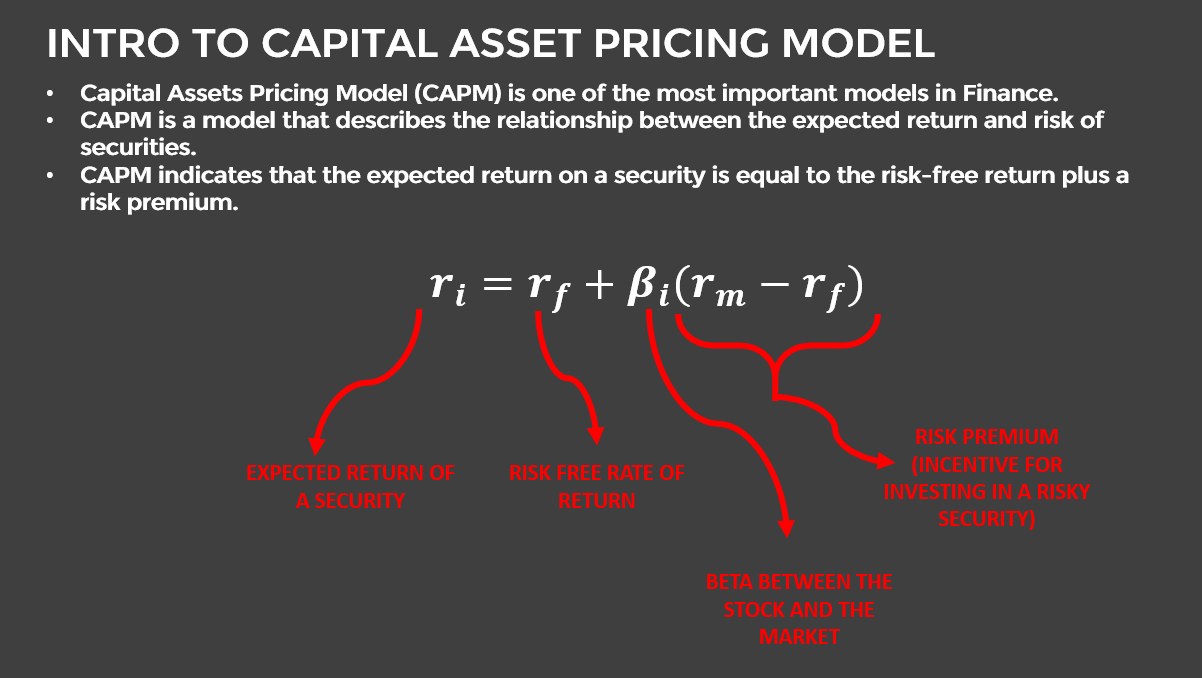

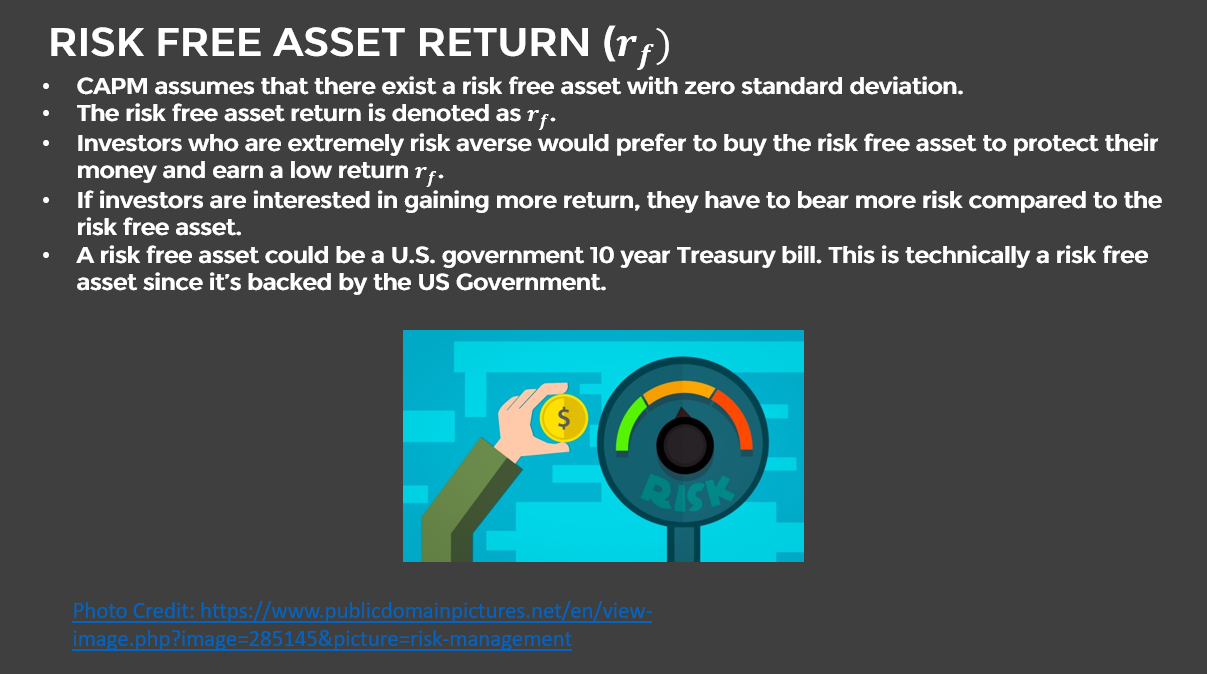

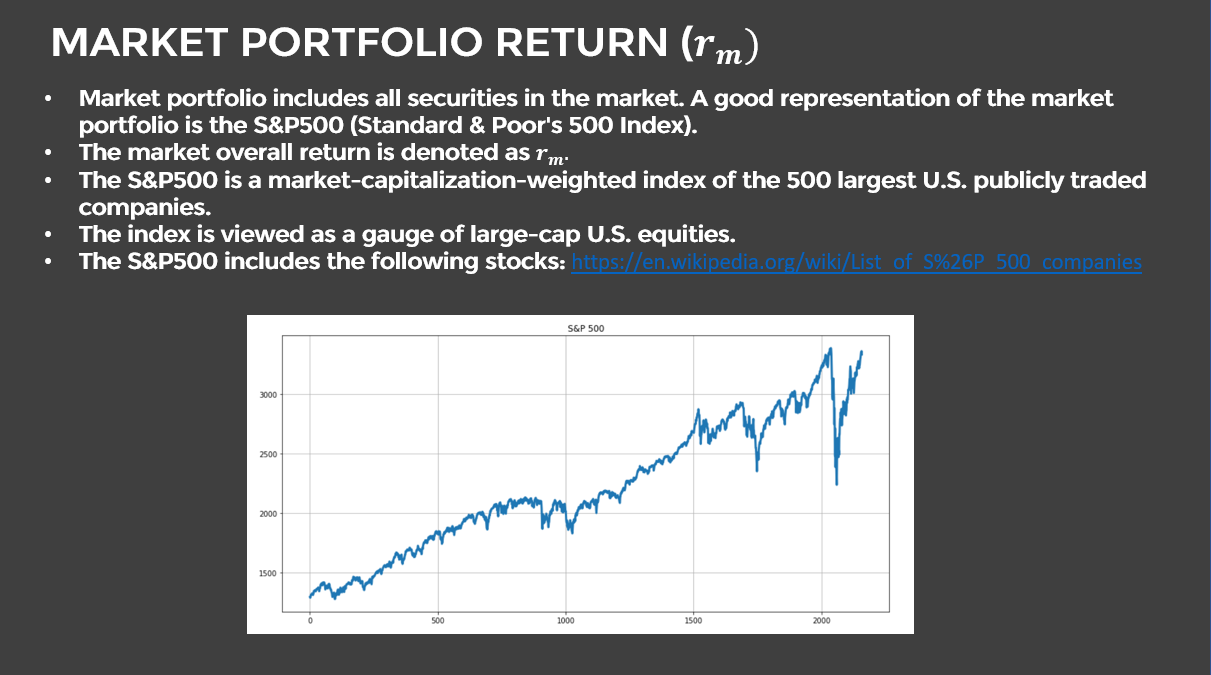

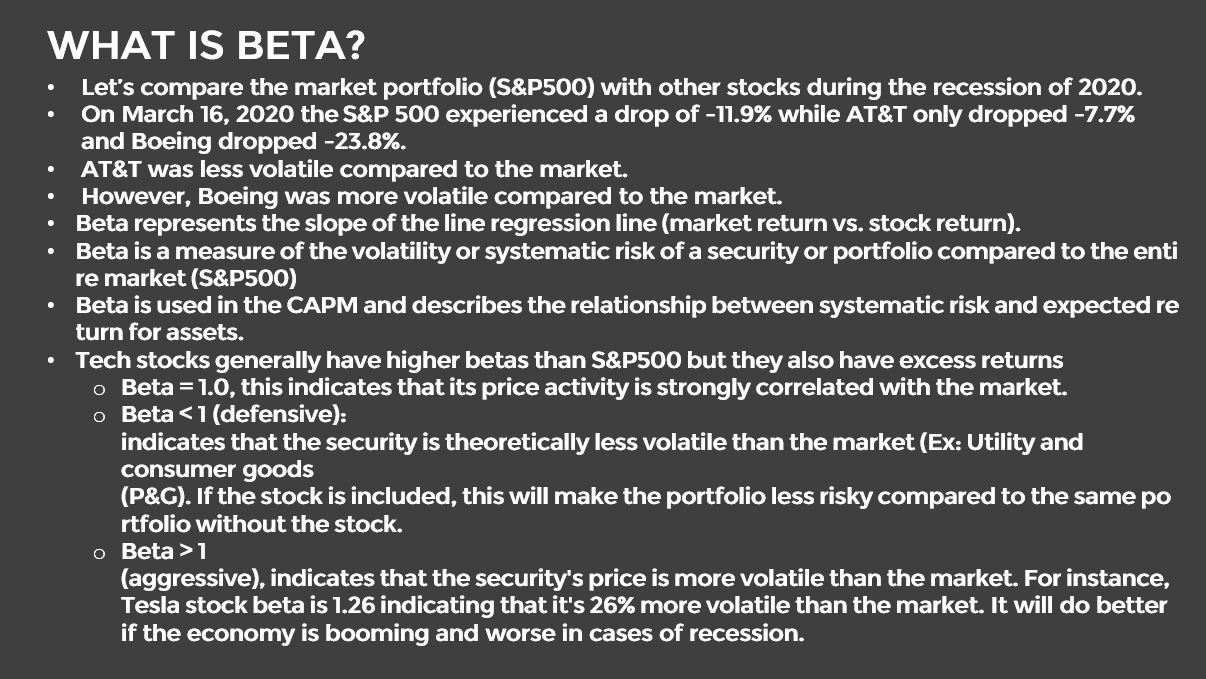

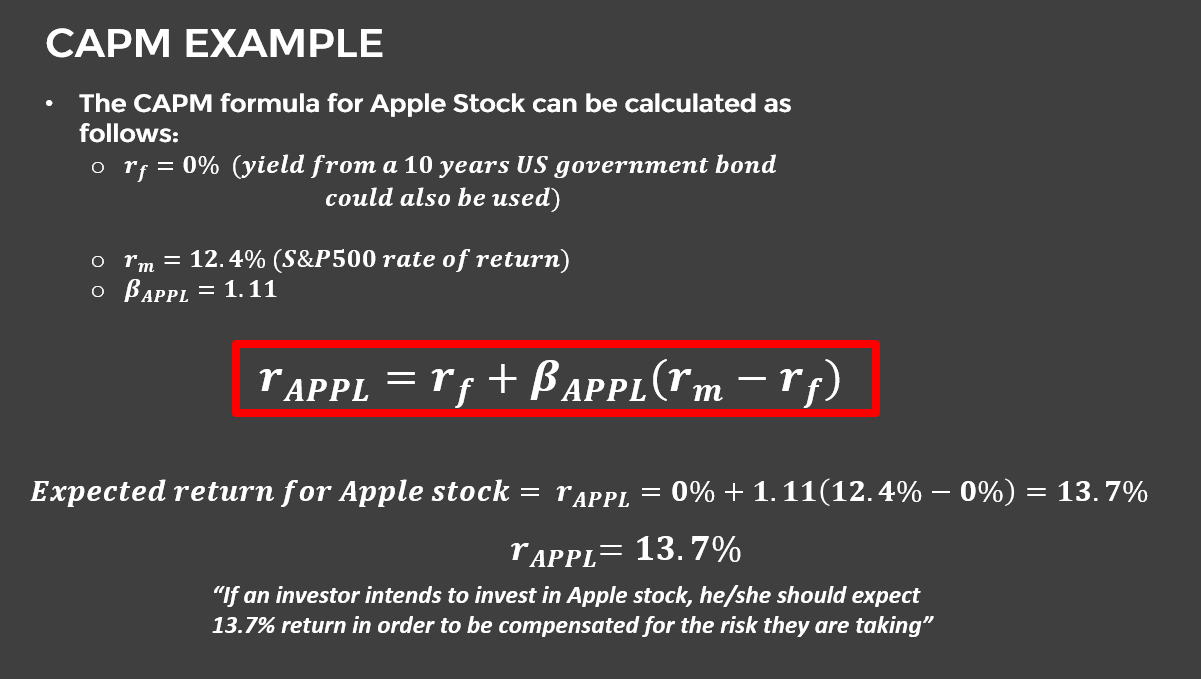

# IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [204]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [205]:
# Read the stock data file
stocks_df = pd.read_csv('stocks_dataset.csv')
stocks_df.head()

Date         FB       TWTR       NFLX          BA          T  \
0   11/7/2013  47.560001  44.900002  46.694286  131.509995  35.110001   
1   11/8/2013  47.529999  41.650002  47.842857  133.490005  35.169998   
2  11/11/2013  46.200001  42.900002  48.272858  132.529999  35.029999   
3  11/12/2013  46.610001  41.900002  47.675713  132.330002  35.169998   
4  11/13/2013  48.709999  42.599998  47.897144  133.169998  35.070000   

         MGM        TSLA        sp500  
0  18.580000  139.770004  1747.150024  
1  19.090000  137.949997  1770.609985  
2  19.200001  144.699997  1771.890015  
3  19.260000  137.800003  1767.689941  
4  19.700001  138.699997  1782.000000

In [206]:
# Getting dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1699 non-null   object 
 1   FB      1699 non-null   float64
 2   TWTR    1699 non-null   float64
 3   NFLX    1699 non-null   float64
 4   BA      1699 non-null   float64
 5   T       1699 non-null   float64
 6   MGM     1699 non-null   float64
 7   TSLA    1699 non-null   float64
 8   sp500   1699 non-null   float64
dtypes: float64(8), object(1)
memory usage: 119.6+ KB


MINI CHALLENGE #1: 
- What is the average price of Netflix?
- What is the maximum price for S&P500 stock over the specified time period?
- Hint: Try this out: stocks_df.describe() 

In [207]:
stocks_df.describe()

FB         TWTR         NFLX           BA            T  \
count  1699.000000  1699.000000  1699.000000  1699.000000  1699.000000   
mean    135.966863    31.296698   195.423654   218.325633    35.296986   
std      50.062473    11.508628   127.700712    98.968191     3.412142   
min      44.820000    14.010000    44.887142    95.010002    26.770000   
25%      88.080002    19.600001    90.474998   132.840004    32.790001   
50%     136.759995    31.610001   143.830002   158.289993    34.900002   
75%     178.075005    38.229999   320.024993   334.360001    38.004999   
max     268.440002    73.309998   548.729980   440.619995    43.470001   

               MGM         TSLA        sp500  
count  1699.000000  1699.000000  1699.000000  
mean     25.720865   311.299388  2413.219428  
std       5.200605   203.097452   424.825240  
min       7.140000   120.500000  1741.890015  
25%      21.935001   218.829994  2053.294921  
50%      25.879999   253.740005  2360.159912  
75%      29.250000   323.565002  2783.330078  
max      38.029999  1643.000000  3386.149902

# PERFORM DATA SCALING 

In [208]:
# Function to normalize the prices based on the initial price
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i]= x[i]/x[i][0]
    return x

In [209]:
normalize_df = normalize(stocks_df)

MINI CHALLENGE #2:
- If you invested $1000 in NFLX on November 7th, 2013, how much money would you have on Aug 7th, 2020?

In [210]:
normalize_df


Date        FB      TWTR       NFLX        BA         T       MGM  \
0      11/7/2013  1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   
1      11/8/2013  0.999369  0.927617   1.024598  1.015056  1.001709  1.027449   
2     11/11/2013  0.971405  0.955457   1.033807  1.007756  0.997721  1.033369   
3     11/12/2013  0.980025  0.933185   1.021018  1.006235  1.001709  1.036598   
4     11/13/2013  1.024180  0.948775   1.025760  1.012623  0.998861  1.060280   
...          ...       ...       ...        ...       ...       ...       ...   
1694    8/3/2020  5.297729  0.810468  10.678394  1.233899  0.843634  0.878364   
1695    8/4/2020  5.252944  0.809577  10.914398  1.255190  0.854742  0.899892   
1696    8/5/2020  5.238015  0.819376  10.753136  1.325222  0.850185  0.899892   
1697    8/6/2020  5.577796  0.839421  10.902404  1.309406  0.849900  0.993541   
1698    8/7/2020  5.644239  0.827171  10.595087  1.292830  0.855027  1.024220   

           TSLA     sp500  
0      1.000000  1.000000  
1      0.986979  1.013428  
2      1.035272  1.014160  
3      0.985905  1.011756  
4      0.992345  1.019947  
...         ...       ...  
1694  10.624597  1.885705  
1695  10.638906  1.892516  
1696  10.624740  1.904685  
1697  10.657365  1.916927  
1698  10.393575  1.918141  

[1699 rows x 9 columns]

# PERFORM DATA VISUALIZATION

In [211]:
# Function to plot interactive plot
def interactive_plot(df,title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'],y = df[i] , name = i)
        
    fig.show()

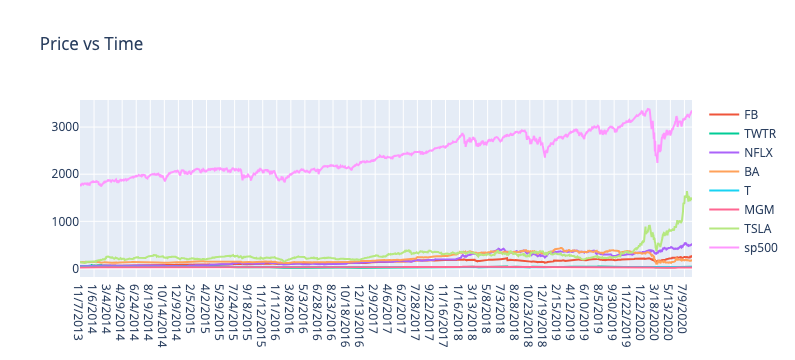

In [212]:
# Plot interactive chart
interactive_plot(stocks_df , 'Price vs Time')

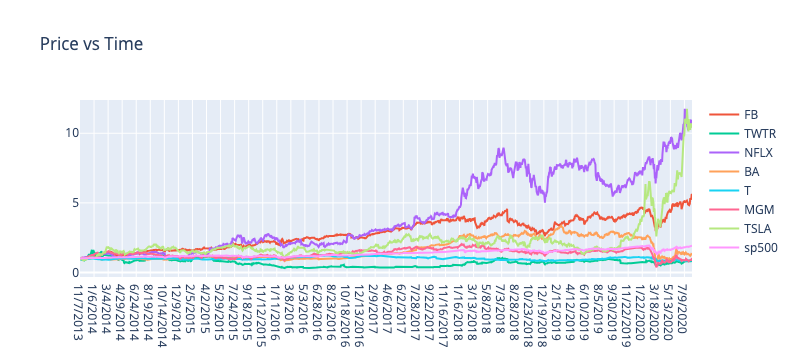

In [213]:
# Plot normalized interactive chart
interactive_plot(normalize_df , 'Price vs Time')

MINI CHALLENGE #3:
- It seems that most stocks experienced massive drops in Q1 of 2020, let's assume that you own 1000 shares of Facebook on Jan 2nd, 2020 and you sold them on March 16th, 2020. How much did you lose (in $)?**

In [214]:
stocks_df.head()

Date         FB       TWTR       NFLX          BA          T  \
0   11/7/2013  47.560001  44.900002  46.694286  131.509995  35.110001   
1   11/8/2013  47.529999  41.650002  47.842857  133.490005  35.169998   
2  11/11/2013  46.200001  42.900002  48.272858  132.529999  35.029999   
3  11/12/2013  46.610001  41.900002  47.675713  132.330002  35.169998   
4  11/13/2013  48.709999  42.599998  47.897144  133.169998  35.070000   

         MGM        TSLA        sp500  
0  18.580000  139.770004  1747.150024  
1  19.090000  137.949997  1770.609985  
2  19.200001  144.699997  1771.890015  
3  19.260000  137.800003  1767.689941  
4  19.700001  138.699997  1782.000000

In [215]:
fb_Jan_2020 = (1000*209.78)
fb_Mar_2020 = (146.01*1000)
loss = fb_Mar_2020 - fb_Jan_2020
loss

-63770.0

#  DEVELOP A FUNCTION TO CALCULATE DAILY RETURNS

# Function to calculate the daily returns 
def stock_daily_return(df):
    # Make a copy to avoid modifying the original DataFrame
    df_daily_return = df.copy()
    
    # Compute daily returns for all columns except the first one
    for i in df.columns[1:]:
        for j in range(1,len(df)):
            df_daily_return[i][j] = ((df[i][j] - df[i][j-1]) / df[i][j-1])*100
        df_daily_return[i][0] = 0
    return df_daily_return

In [216]:
# Function to calculate the daily returns 
def stock_daily_return(df):
    # Make a copy to avoid modifying the original DataFrame
    df_daily_return = df.copy()
    
    # Compute daily returns for all columns except the first one
    for i in df.columns[1:]:
        df_daily_return[i] = df[i].pct_change() * 100  # Percentage change in Pandas
    
    # Replace NaN in the first row with 0 (no return on the first day)
    df_daily_return.fillna(0, inplace=True)
    
    return df_daily_return
        

MINI CHALLENGE #4: 
- Test the "daily_return" function and perform sanity check

In [217]:
stocks_daily_return = stock_daily_return(stocks_df)
stocks_daily_return

Date        FB      TWTR      NFLX        BA         T        MGM  \
0      11/7/2013  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   
1      11/8/2013 -0.063082 -7.238307  2.459768  1.505597  0.170883   2.744887   
2     11/11/2013 -2.798229  3.001200  0.898778 -0.719159 -0.398064   0.576223   
3     11/12/2013  0.887446 -2.331002 -1.237020 -0.150907  0.399655   0.312495   
4     11/13/2013  4.505467  1.670635  0.464452  0.634774 -0.284328   2.284533   
...          ...       ...       ...       ...       ...       ...        ...   
1694    8/3/2020 -0.674101 -0.027481  1.992307  2.702534  0.135230   1.429459   
1695    8/4/2020 -0.845374 -0.109923  2.210104  1.725521  1.316674   2.450974   
1696    8/5/2020 -0.284196  1.210462 -1.477519  5.579446 -0.533156   0.000000   
1697    8/6/2020  6.486835  2.446311  1.388142 -1.193483 -0.033501  10.406699   
1698    8/7/2020  1.191195 -1.459273 -2.818806 -1.265966  0.603217   3.087768   

          TSLA     sp500  
0     0.000000  0.000000  
1    -1.302144  1.342756  
2     4.893077  0.072293  
3    -4.768482 -0.237039  
4     0.653116  0.809534  
...        ...       ...  
1694  3.790991  0.718102  
1695  0.134680  0.361193  
1696 -0.133153  0.642974  
1697  0.307062  0.642770  
1698 -2.475194  0.063303  

[1699 rows x 9 columns]

# CALCULATE BETA FOR FACEBOOK STOCK

In [218]:
# Select any stock, let's say FB
stocks_daily_return['FB']

0       0.000000
1      -0.063082
2      -2.798229
3       0.887446
4       4.505467
          ...   
1694   -0.674101
1695   -0.845374
1696   -0.284196
1697    6.486835
1698    1.191195
Name: FB, Length: 1699, dtype: float64

In [219]:
# Select the S&P500 (Market)
stocks_daily_return['sp500']

0       0.000000
1       1.342756
2       0.072293
3      -0.237039
4       0.809534
          ...   
1694    0.718102
1695    0.361193
1696    0.642974
1697    0.642770
1698    0.063303
Name: sp500, Length: 1699, dtype: float64

<Axes: xlabel='sp500', ylabel='FB'>

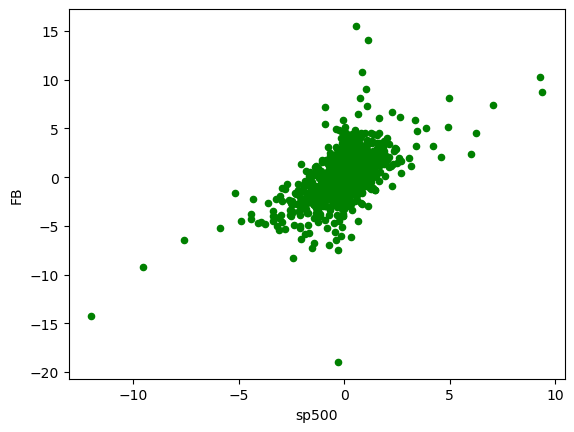

In [220]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'FB' , color = 'g')

In [221]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return). 
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!


# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return). 
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!


beta_FB, alpha_FB = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['FB'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('FB', beta_FB, alpha_FB))  

Beta for FB stock is = 1.0968490880203279 and alpha is = 0.07364315164626298


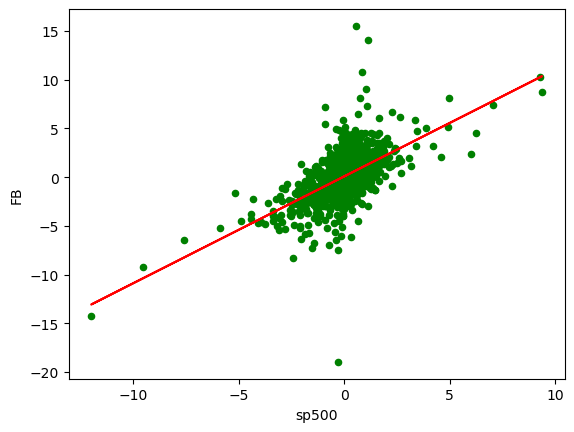

In [222]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'FB', color = 'g')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta_FB * stocks_daily_return['sp500'] + alpha_FB, '-', color = 'r')


MINI CHALLENGE #5:
- Calculate Beta for MGM Stock

In [223]:
beta_MGM, alpha_MGM = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['MGM'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('MGM', beta_MGM, alpha_MGM))  

Beta for MGM stock is = 1.6517124147928939 and alpha is = -0.030189775264089454


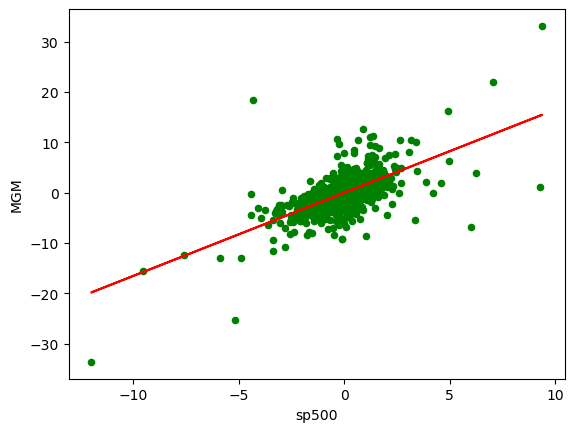

In [224]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'MGM', color = 'g')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta_MGM * stocks_daily_return['sp500'] + alpha_MGM, '-', color = 'r')


# APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK 

In [225]:
beta_FB


1.0968490880203279

In [226]:
# Let's calculate the average daily rate of return for S&P500
sp500_ADR = stocks_daily_return['sp500'].mean()

In [227]:
# Let's calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
rm = sp500_ADR*252
rm

11.2325516560291

In [228]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate

# Calculate return for any security (FB) using CAPM  


In [229]:
rf = 0
r_FB = rf + beta_FB*(rm - rf)
print('Expected return for Facebook: {} %'.format(r_FB))

Expected return for Facebook: 12.320414040056741 %


MINI CHALLENGE #6:
- Apply CAPM formula to calculate the return for Boeing 

In [230]:
beta_B, alpha_B = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['BA'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('BA', beta_B, alpha_B))  

Beta for BA stock is = 1.4304608163084254 and alpha is = -0.018375307069242317


In [231]:
r_BA = rf + beta_B*(rm - rf)
print('Expected return for Boeing : {} %'.format(r_BA))

Expected return for Boeing : 16.067725011109943 %


# CALCULATE BETA FOR ALL STOCKS

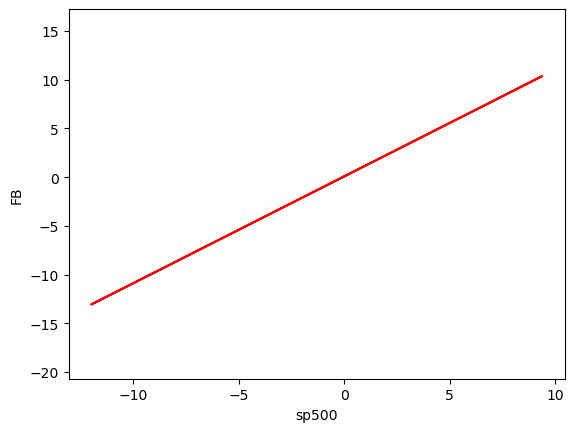

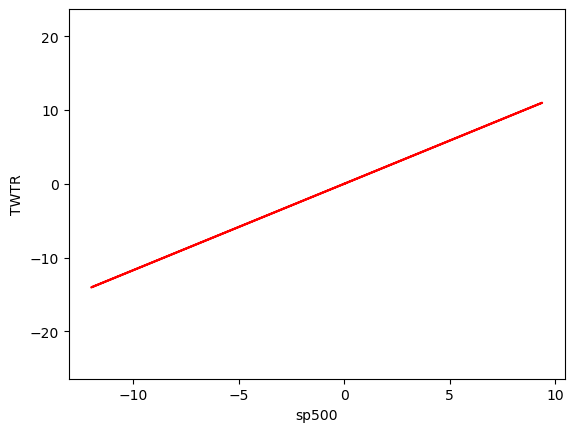

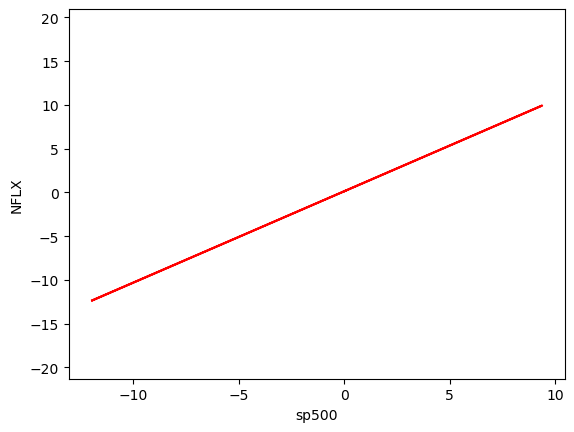

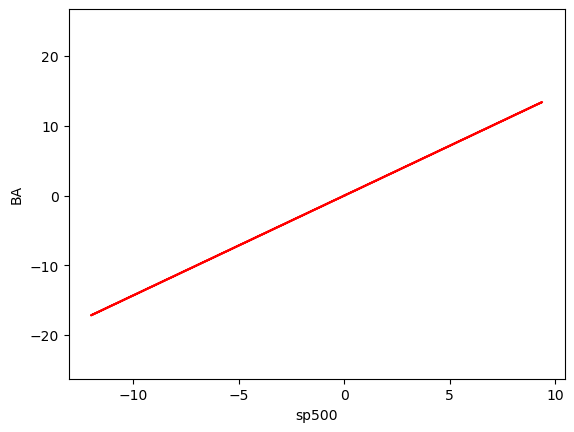

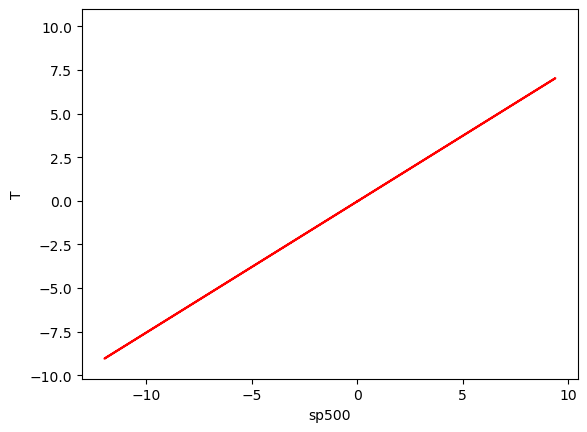

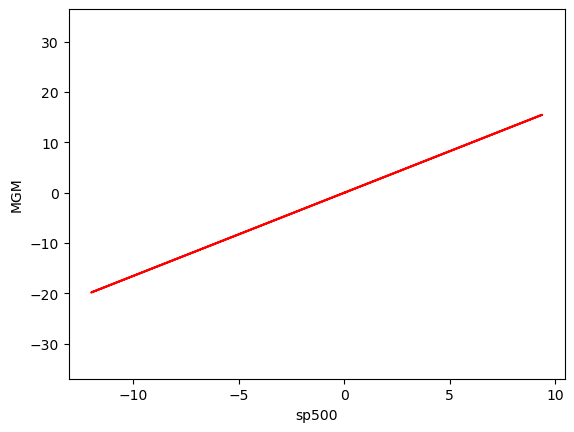

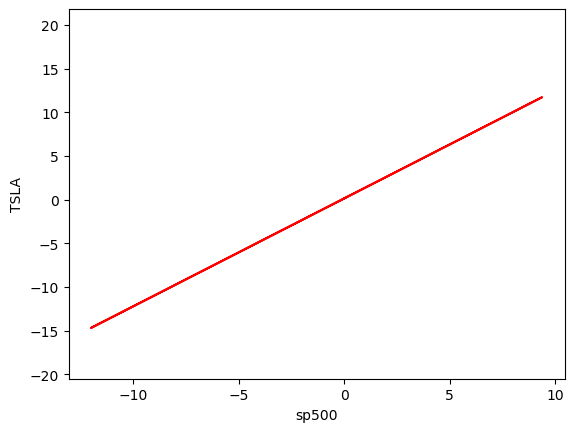

In [232]:
# Let's create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

  # Ignoring the date and S&P500 Columns 
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i, color = 'w')
    
    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')
    
    beta[i] = b
    
    alpha[i] = a
    
    plt.show()

In [233]:
# Let's view Beta for every stock 
beta

{'FB': 1.0968490880203279,
 'TWTR': 1.1723596183159968,
 'NFLX': 1.044572448544949,
 'BA': 1.4304608163084254,
 'T': 0.7523861924715619,
 'MGM': 1.6517124147928939,
 'TSLA': 1.2359723602006591}

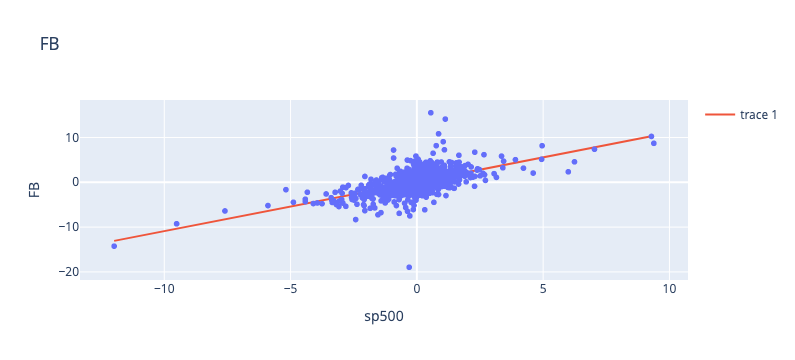

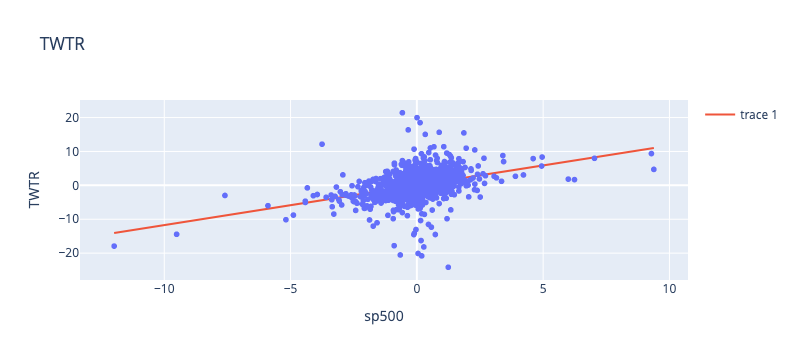

In [234]:
# Let's do the same plots but in an interactive way
# Explore some wierd points in the dataset: Tesla stock return was at 24% when the S&P500 return was -0.3%!

for i in stocks_daily_return.columns:
  
  if i != 'Date' and i != 'sp500':
    
    # Use plotly express to plot the scatter plot for every stock vs. the S&P500
    fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)

    # Fit a straight line to the data and obtain beta and alpha
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    # Plot the straight line 
    fig.add_scatter(x = stocks_daily_return['sp500'], y = b*stocks_daily_return['sp500'] + a)
    fig.show()

In [235]:
import pandas as pd

# Given data
beta_values = {
    'FB': 1.0968490880203279,
    'TWTR': 1.1723596183159968,
    'NFLX': 1.044572448544949,
    'BA': 1.4304608163084254,
    'T': 0.7523861924715619,
    'MGM': 1.6517124147928939,
    'TSLA': 1.2359723602006591
}

# Assumed risk-free rate (rf) and market return (rm)
rf = 0.03  # Example: 3%

# Create a DataFrame to store results
columns = ['FB', 'TWTR', 'NFLX', 'BA', 'T', 'MGM', 'TSLA']
expected_returns = pd.DataFrame(columns=['Stock', 'Expected Return'])

# Calculate expected return for each stock
for stock, beta in beta_values.items():
    re = rf + beta * (rm - rf)
    expected_returns = pd.concat([expected_returns, pd.DataFrame({'Stock': [stock], 'Expected Return': [re]})], ignore_index=True)

# Print the expected returns
print(expected_returns)


  Stock  Expected Return
0    FB        12.317509
1  TWTR        13.163419
2  NFLX        11.731877
3    BA        16.054811
4     T         8.458645
5   MGM        18.533394
6  TSLA        13.876044


/var/folders/8y/nqr998r96qx2qd1jpf6194nr0000gn/T/ipykernel_24489/995013376.py:24: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



# Create Function for the CAPM formula

In [236]:
def calculate_expected_return(beta_values, rf, rm):
    """
    Calculate expected returns using the CAPM formula.

    Parameters:
    - beta_dict (dict): A dictionary where keys are asset names and values are betas.
    - rf (float): Risk-free rate (e.g., 0.03 for 3%).
    - rm (float): Expected market return (e.g., 0.08 for 8%).

    Returns:
    - dict: A dictionary with asset names as keys and expected returns as values.
    """
    expected_returns = {}
    for asset, beta in beta_values.items():
        expected_returns[asset] = rf + beta * (rm - rf)
    return expected_returns

In [237]:
calculate_expected_return(beta_values , 0 , rm)

{'FB': 12.320414040056741,
 'TWTR': 13.168589972176994,
 'NFLX': 11.73321398674594,
 'BA': 16.067725011109943,
 'T': 8.451216772219873,
 'MGM': 18.552945020065746,
 'TSLA': 13.883123381378109}

MINI CHALLENGE #7 (TAKE HOME):
- Download the data for your favourite stock over the past 5 years and perform analysis. 

In [238]:
import yfinance as yf
apple = yf.Ticker("AAPL")

In [239]:
apple_data = yf.download("AAPL", period="5y")

[*********************100%***********************]  1 of 1 completed


In [240]:
apple_data.reset_index(inplace = True)

In [241]:
apple_data

Price        Date       Close        High         Low        Open     Volume
Ticker                   AAPL        AAPL        AAPL        AAPL       AAPL
0      2020-06-09   83.595505   83.989192   80.684163   80.715756  147712400
1      2020-06-10   85.746216   86.215237   84.105849   84.545710  166651600
2      2020-06-11   81.629494   85.313636   81.527431   84.888356  201662400
3      2020-06-12   82.334251   84.521407   81.221236   83.772917  200146000
4      2020-06-15   83.352486   84.006203   80.822675   80.985500  138808800
...           ...         ...         ...         ...         ...        ...
1252   2025-06-03  203.270004  203.770004  200.960007  201.350006   46381600
1253   2025-06-04  202.820007  206.240005  202.100006  202.910004   43604000
1254   2025-06-05  200.630005  204.750000  200.149994  203.500000   55126100
1255   2025-06-06  203.919998  205.699997  202.050003  203.000000   46539200
1256   2025-06-09  204.309998  206.000000  203.979996  204.389999   15915891

[1257 rows x 6 columns]

In [242]:
apple_data['Returns'] = apple_data['Close'].pct_change()

In [243]:
print(apple_data.columns)

MultiIndex([(   'Date',     ''),
            (  'Close', 'AAPL'),
            (   'High', 'AAPL'),
            (    'Low', 'AAPL'),
            (   'Open', 'AAPL'),
            ( 'Volume', 'AAPL'),
            ('Returns',     '')],
           names=['Price', 'Ticker'])


In [244]:
# Rename the column and reassign it back to the DataFrame
apple_Daily_return = apple_Daily_return.rename(columns={"Returns": "Apple Daily Return"})

# Ensure the first value in the "Apple Daily Return" column is 0
apple_Daily_return.loc[0, 'Apple Daily Return'] = 0

# Print the updated DataFrame
print(apple_Daily_return)


Price        Date Apple Daily Return
Ticker                              
0      2020-06-08           0.000000
1      2020-06-09           0.031578
2      2020-06-10           0.025728
3      2020-06-11          -0.048010
4      2020-06-12           0.008633
...           ...                ...
1252   2025-06-02           0.004232
1253   2025-06-03           0.007784
1254   2025-06-04          -0.002214
1255   2025-06-05          -0.010798
1256   2025-06-06           0.016398

[1257 rows x 2 columns]


In [245]:
sp500_data = yf.download("^GSPC", period="5y")

[*********************100%***********************]  1 of 1 completed


In [246]:
print(sp500_data.columns)

MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])


In [247]:
sp500_data.reset_index(inplace = True)

In [248]:
sp500_data['Returns'] = sp500_data['Close'].pct_change()

In [249]:
sp500_Daily_return = sp500_data[['Returns']]
sp500_Daily_return.loc[0, 'Returns'] = 0
sp500_Daily_return = sp500_Daily_return.rename(columns={"Returns": "sp500 Daily returns"})
sp500_Daily_return

Price  sp500 Daily returns
Ticker                    
0                 0.000000
1                -0.005313
2                -0.058944
3                 0.013061
4                 0.008312
...                    ...
1252              0.005800
1253              0.000074
1254             -0.005277
1255              0.010281
1256              0.000847

[1257 rows x 1 columns]

In [250]:
sp500_Daily_return.head()

Price  sp500 Daily returns
Ticker                    
0                 0.000000
1                -0.005313
2                -0.058944
3                 0.013061
4                 0.008312

In [251]:
beta_appl, alpha_appl = np.polyfit(sp500_Daily_return['sp500 Daily returns'], apple_Daily_return['Apple Daily Return'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('Apple', beta_appl, alpha_appl))  

Beta for Apple stock is = -0.08387909228540122 and alpha is = 0.0009595287514585258


In [252]:
sp500_returns = (sp500_Daily_return['sp500 Daily returns'].mean())
sp500_returns

0.0005614858022746841

In [253]:
rm_sp500 = sp500_returns *252
rm_sp500

0.1414944221732204

In [254]:
rf

0.03

In [255]:
r_appl = rf + beta_appl*(rm_sp500 - rf)
print('Expected return for Apple : {} %'.format(r_appl))

Expected return for Apple : 0.02064794907322496 %


In [256]:
sp500_Daily_return.reset_index(drop=True, inplace=True)
apple_Daily_return.reset_index(drop=True, inplace=True)

# Combine the dataframes column-wise
combined_returns = pd.concat([ apple_Daily_return , sp500_Daily_return], axis=1)

In [257]:
combined_returns.columns

MultiIndex([(               'Date', ''),
            ( 'Apple Daily Return', ''),
            ('sp500 Daily returns', '')],
           names=['Price', 'Ticker'])

In [258]:
combined_returns.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in combined_returns.columns]

In [259]:

combined_returns


Date  Apple Daily Return  sp500 Daily returns
0    2020-06-08            0.000000             0.000000
1    2020-06-09            0.031578            -0.005313
2    2020-06-10            0.025728            -0.058944
3    2020-06-11           -0.048010             0.013061
4    2020-06-12            0.008633             0.008312
...         ...                 ...                  ...
1252 2025-06-02            0.004232             0.005800
1253 2025-06-03            0.007784             0.000074
1254 2025-06-04           -0.002214            -0.005277
1255 2025-06-05           -0.010798             0.010281
1256 2025-06-06            0.016398             0.000847

[1257 rows x 3 columns]

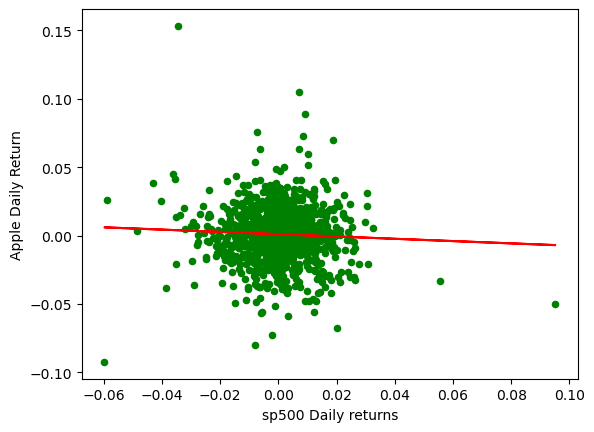

In [260]:
combined_returns.plot(kind = 'scatter', x = 'sp500 Daily returns', y = 'Apple Daily Return', color = 'g')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(combined_returns['sp500 Daily returns'], beta_appl * combined_returns['sp500 Daily returns'] + alpha_appl, '-', color = 'r')


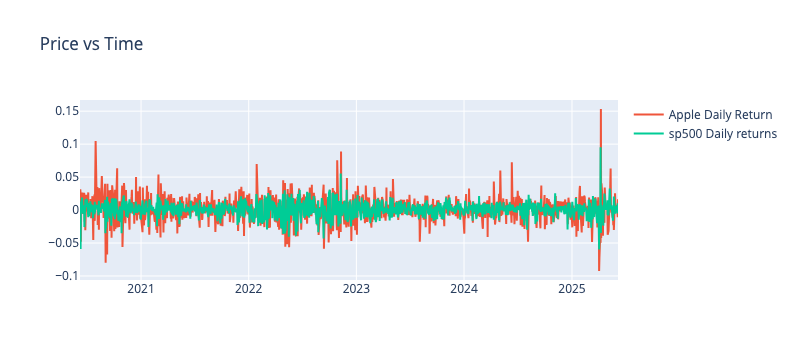

In [261]:
interactive_plot(combined_returns , 'Price vs Time')

# AWESOME JOB!